In [ ]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Use glob() to list all files

In [ ]:
filenames = glob("*.xlsx")
print('File names: ',filenames)

File names:  ['NewData.xlsx']


In [ ]:
data = pd.read_excel('NewData.xlsx')
data.shape

(19877, 12)

In [ ]:
data.columns


Index(['Unnamed: 0', 'NAME', 'GENDER', 'YEAR', 'STREAM', 'RESULT', 'ENG',
       'DZO', 'PHY', 'CHE', 'MATH', 'BIO'],
      dtype='object')

In [ ]:
df=data[['NAME', 'GENDER','YEAR','STREAM','RESULT','ENG','DZO','PHY','CHE','MATH','BIO']]
df.head()

NAME GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY  \
0           BHUDHIMAN KAMI      M  2012  SCIENCE    PCA  55.0  58.0  48.0   
1             GALEY ZANGPO      M  2012  SCIENCE    PCA  55.0  60.0  44.0   
2  JAMYANG LHENDUP GAYLLEY      M  2012  SCIENCE    PCA  69.0  55.0  74.0   
3            JIGME SAMDRUP      M  2012  SCIENCE    PCA  58.0  48.0  55.0   
4          KARMA GYELTSHEN      M  2012  SCIENCE    PCA  64.0  58.0  55.0   

    CHE  MATH   BIO  
0  55.0  30.0  46.0  
1  62.0  40.0  50.0  
2  74.0  60.0  62.0  
3  72.0  74.0   NaN  
4  60.0  60.0  34.0

In [ ]:
df.drop(['NAME'],axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.drop(df.index[df['RESULT']=='ABS'],inplace=True)
df.dropna(subset=['RESULT'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.YEAR.astype(int)

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
19872    2018
19873    2018
19874    2018
19875    2018
19876    2018
Name: YEAR, Length: 19464, dtype: int64

In [ ]:
df.dtypes

GENDER     object
YEAR        int64
STREAM     object
RESULT     object
ENG       float64
DZO       float64
PHY       float64
CHE       float64
MATH      float64
BIO       float64
dtype: object

In [ ]:
df = df.groupby('STREAM')

In [ ]:
df = df.get_group('SCIENCE')
df.shape

(19464, 10)

In [ ]:
df.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
0      M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  30.0  46.0
1      M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  40.0  50.0
2      M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  60.0  62.0
3      M  2012  SCIENCE    PCA  58.0  48.0  55.0  72.0  74.0   NaN
4      M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  60.0  34.0

In [ ]:
df.replace(0,np.nan,inplace=True)
df.isna().sum()

GENDER        0
YEAR          0
STREAM        0
RESULT        0
ENG           4
DZO          28
PHY           3
CHE           3
MATH         18
BIO       17222
dtype: int64

Only Bio

In [ ]:
bio_df = df.drop(['MATH'], axis = 1)
bio_df



GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE   BIO
0          M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  46.0
1          M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  50.0
2          M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  62.0
3          M  2012  SCIENCE    PCA  58.0  48.0  55.0  72.0   NaN
4          M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  34.0
...      ...   ...      ...    ...   ...   ...   ...   ...   ...
19872      M  2018  SCIENCE    PCA  57.0  48.0  76.0  70.0   NaN
19873      M  2018  SCIENCE    PCA  45.0  40.0  45.0  44.0   NaN
19874      M  2018  SCIENCE    PCA  51.0  45.0  66.0  55.0   NaN
19875      M  2018  SCIENCE    PCA  58.0  74.0  55.0  69.0   NaN
19876      M  2018  SCIENCE    PCA  59.0  60.0  81.0  74.0   NaN

[19464 rows x 9 columns]

In [ ]:
bio_df[['ENG','DZO','PHY','CHE','BIO']] =bio_df[['ENG','DZO','PHY','CHE','BIO']].fillna(bio_df[['ENG','DZO','PHY','CHE','BIO']].mean())

In [ ]:
bio_df.dropna(inplace=True)
bio_df.isna().sum()

GENDER    0
YEAR      0
STREAM    0
RESULT    0
ENG       0
DZO       0
PHY       0
CHE       0
BIO       0
dtype: int64

In [ ]:
import sklearn

In [ ]:
bio_df.head()


GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE        BIO
0      M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  46.000000
1      M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  50.000000
2      M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  62.000000
3      M  2012  SCIENCE    PCA  58.0  48.0  55.0  72.0  61.652542
4      M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  34.000000

spliting data for training and testing

In [ ]:
x =bio_df.drop(['RESULT','GENDER','STREAM','YEAR'],axis=1)
x

ENG   DZO   PHY   CHE        BIO
0      55.0  58.0  48.0  55.0  46.000000
1      55.0  60.0  44.0  62.0  50.000000
2      69.0  55.0  74.0  74.0  62.000000
3      58.0  48.0  55.0  72.0  61.652542
4      64.0  58.0  55.0  60.0  34.000000
...     ...   ...   ...   ...        ...
19872  57.0  48.0  76.0  70.0  61.652542
19873  45.0  40.0  45.0  44.0  61.652542
19874  51.0  45.0  66.0  55.0  61.652542
19875  58.0  74.0  55.0  69.0  61.652542
19876  59.0  60.0  81.0  74.0  61.652542

[19464 rows x 5 columns]

In [ ]:
y = bio_df.drop(['ENG','DZO','PHY','CHE','BIO','GENDER','YEAR','STREAM'],axis=1)
y

RESULT
0        PCA
1        PCA
2        PCA
3        PCA
4        PCA
...      ...
19872    PCA
19873    PCA
19874    PCA
19875    PCA
19876    PCA

[19464 rows x 1 columns]

encoding our target values

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
lab_y = labelEncoder.fit_transform(y)
lab_y
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)
# lab_y=ohe.fit_transform(y)
# lab_y.reshape(-1,1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

scaling our training data

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaled = StandardScaler()
# scaled_x = scaled.fit_transform(x)
lab_y = pd.DataFrame(lab_y)
lab_y

0
0      0
1      0
2      0
3      0
4      0
...   ..
19459  0
19460  0
19461  0
19462  0
19463  0

[19464 rows x 1 columns]

model training

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,lab_y,test_size=0.2,stratify=y,random_state=5,shuffle = True)
xtrain

ENG   DZO   PHY   CHE        BIO
9347   77.0  75.0  70.0  56.0  65.000000
19038  61.0  73.0  60.0  47.0  61.652542
15358  61.0  53.0  84.0  72.0  61.652542
19544  66.0  67.0  74.0  62.0  61.652542
2261   58.0  58.0  40.0  50.0  61.652542
...     ...   ...   ...   ...        ...
16667  62.0  74.0  77.0  69.0  61.652542
15479  63.0  68.0  70.0  62.0  61.652542
3869   52.0  67.0  50.0  55.0  61.652542
19045  45.0  57.0  46.0  40.0  61.652542
13468  41.0  52.0  47.0  43.0  61.652542

[15571 rows x 5 columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(xtrain,ytrain)

0.9997431121957485

In [ ]:
model.score(xtest,ytest)

0.971230413562805

In [ ]:
Y = np.array([55,58,60,54,80])
np = Y.reshape(-1,5)
model.predict(np)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

#Bio-Math

In [ ]:
model.predict(xtest)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# removing na value in bio and math
bio_math = df.dropna(subset=['BIO','MATH'])

In [ ]:
bio_math.dropna(subset=['DZO'],inplace=True)
bio_math.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


GENDER    0
YEAR      0
STREAM    0
RESULT    0
ENG       0
DZO       0
PHY       0
CHE       0
MATH      0
BIO       0
dtype: int64

In [ ]:
bio_math.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
0      M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  30.0  46.0
1      M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  40.0  50.0
2      M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  60.0  62.0
4      M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  60.0  34.0
6      M  2012  SCIENCE    PCA  44.0  58.0  50.0  66.0  40.0  44.0

split training and testing data

In [ ]:
x = bio_math.drop(['GENDER','YEAR','STREAM','RESULT'],axis=1)
x.head()

ENG   DZO   PHY   CHE  MATH   BIO
0  55.0  58.0  48.0  55.0  30.0  46.0
1  55.0  60.0  44.0  62.0  40.0  50.0
2  69.0  55.0  74.0  74.0  60.0  62.0
4  64.0  58.0  55.0  60.0  60.0  34.0
6  44.0  58.0  50.0  66.0  40.0  44.0

In [ ]:
y = bio_math.drop(['GENDER','YEAR','STREAM','ENG','DZO','MATH','PHY','BIO','CHE'],axis=1)
y

RESULT
0        PCA
1        PCA
2        PCA
4        PCA
6        PCA
...      ...
19734    PCA
19735    PCA
19750    PCA
19764    PCA
19819    PCA

[2224 rows x 1 columns]

encoding target

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
lab_y = label.fit_transform(y) 
# from sklearn.preprocessing import OneHotEncoder
# encode = OneHotEncoder(sparse=False)
# lab_y=encode.fit_transform(y).reshape(-1,1)
# lab_y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Scaling training data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

Creating model for Bio-math

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,lab_y,test_size =0.2,stratify=y,random_state=5)
xtrain

array([[ 0.29567782,  1.33120491, -0.22118858, -1.11463545, -0.31279965,
        -0.60918546],
       [-0.67100719,  0.34397635, -0.07166779,  0.68855146, -0.06546038,
         0.23045414],
       [-1.1543497 ,  0.44269921, -0.96879252, -0.46548816, -0.95588174,
        -1.09897523],
       ...,
       [ 1.62486972, -1.43303505, -0.66975094,  0.32791408,  0.18187888,
        -0.9590353 ],
       [ 0.65818471, -0.05091507, -1.11831331, -0.68187059, -1.69789954,
        -1.23891516],
       [ 0.05400657,  0.54142206,  0.077853  ,  1.12131632,  1.1217681 ,
         0.09051421]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(xtrain,ytrain)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(xtrain,ytrain)

1.0

In [ ]:
model.score(xtest,ytest)

0.9910112359550561

In [ ]:
# math only, data cleaning 
#math only
math_df = df.drop(['BIO'], axis = 1)
math_df

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH
0          M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  30.0
1          M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  40.0
2          M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  60.0
3          M  2012  SCIENCE    PCA  58.0  48.0  55.0  72.0  74.0
4          M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  60.0
...      ...   ...      ...    ...   ...   ...   ...   ...   ...
19872      M  2018  SCIENCE    PCA  57.0  48.0  76.0  70.0  92.0
19873      M  2018  SCIENCE    PCA  45.0  40.0  45.0  44.0  59.0
19874      M  2018  SCIENCE    PCA  51.0  45.0  66.0  55.0  57.0
19875      M  2018  SCIENCE    PCA  58.0  74.0  55.0  69.0  77.0
19876      M  2018  SCIENCE    PCA  59.0  60.0  81.0  74.0  92.0

[19464 rows x 9 columns]

In [ ]:
math_df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


YEAR    2015.675401
ENG       57.248561
DZO       61.573318
PHY       57.050100
CHE       56.341092
MATH      59.769104
dtype: float64

In [ ]:
math_df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


YEAR    2016.0
ENG       57.0
DZO       62.0
PHY       56.0
CHE       56.0
MATH      60.0
dtype: float64

In [ ]:
math_df[['ENG','DZO','PHY','CHE','MATH']] =math_df[['ENG','DZO','PHY','CHE','MATH']].fillna(math_df[['ENG','DZO','PHY','CHE','MATH']].mean())

In [ ]:
math_df.isna().sum()

GENDER    0
YEAR      0
STREAM    0
RESULT    0
ENG       0
DZO       0
PHY       0
CHE       0
MATH      0
dtype: int64

In [ ]:
math_df.dropna(inplace=True)

In [ ]:
math_df.isna().sum()

GENDER    0
YEAR      0
STREAM    0
RESULT    0
ENG       0
DZO       0
PHY       0
CHE       0
MATH      0
dtype: int64

In [ ]:
math_df.corr()

YEAR       ENG       DZO       PHY       CHE      MATH
YEAR  1.000000  0.210685  0.085256  0.237868 -0.057801  0.030786
ENG   0.210685  1.000000  0.273035  0.406862  0.399679  0.301100
DZO   0.085256  0.273035  1.000000  0.311724  0.348009  0.316038
PHY   0.237868  0.406862  0.311724  1.000000  0.729237  0.667216
CHE  -0.057801  0.399679  0.348009  0.729237  1.000000  0.678888
MATH  0.030786  0.301100  0.316038  0.667216  0.678888  1.000000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

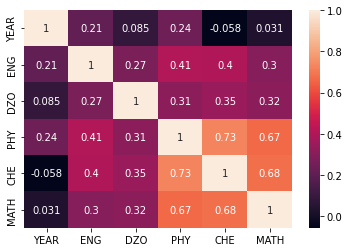

In [ ]:
sns.heatmap(math_df.corr(), annot= True)

In [ ]:
math_df.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH
0      M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  30.0
1      M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  40.0
2      M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  60.0
3      M  2012  SCIENCE    PCA  58.0  48.0  55.0  72.0  74.0
4      M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  60.0

In [ ]:
# spliting data for training and testing

In [ ]:
x = math_df.drop(['RESULT','GENDER','YEAR','STREAM'],axis = 1)
x.head()

ENG   DZO   PHY   CHE  MATH
0  55.0  58.0  48.0  55.0  30.0
1  55.0  60.0  44.0  62.0  40.0
2  69.0  55.0  74.0  74.0  60.0
3  58.0  48.0  55.0  72.0  74.0
4  64.0  58.0  55.0  60.0  60.0

In [ ]:

# target value
y =math_df.drop(['ENG','DZO','PHY','CHE','MATH','GENDER','YEAR','STREAM'], axis = 1)



In [ ]:
y.dtypes

RESULT    object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
lab_y = labelEncoder.fit_transform(y)





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

scaled_x = scaled.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,lab_y,test_size=0.2,stratify=y,random_state=5)
xtrain

array([[ 2.50599774,  1.42222974,  0.97630556, -0.02672252, -0.38465392],
       [ 0.47597025,  1.21037849,  0.22239582, -0.73181787, -1.1233781 ],
       [ 0.47597025, -0.90813403,  2.0317792 ,  1.22678032,  1.32009419],
       ...,
       [-0.66592021,  0.57482474, -0.53151392, -0.10506645,  0.12677051],
       [-1.55405724, -0.48443153, -0.83307782, -1.28022536, -0.83925341],
       [-2.06156411, -1.01405966, -0.75768684, -1.04519358, -0.27100404]])

In [ ]:
ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
xtrain.shape

(15571, 5)

In [ ]:
# using decission tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="entropy")
model1.fit(scaled_x,lab_y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model1.score(scaled_x,lab_y)

1.0

In [ ]:
model1.score(xtest,ytest)
math_df.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH
0      M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  30.0
1      M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  40.0
2      M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  60.0
3      M  2012  SCIENCE    PCA  58.0  48.0  55.0  72.0  74.0
4      M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  60.0

#2012 Analysis

In [ ]:
df.isna().sum()

GENDER        0
YEAR          0
STREAM        0
RESULT        0
ENG           4
DZO          28
PHY           3
CHE           3
MATH         18
BIO       17222
dtype: int64

In [ ]:
df.shape

(19464, 10)

In [ ]:
df12 = df.groupby('YEAR')
df12 = df12.get_group(2012)
df12.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
0      M  2012  SCIENCE    PCA  55.0  58.0  48.0  55.0  30.0  46.0
1      M  2012  SCIENCE    PCA  55.0  60.0  44.0  62.0  40.0  50.0
2      M  2012  SCIENCE    PCA  69.0  55.0  74.0  74.0  60.0  62.0
3      M  2012  SCIENCE    PCA  58.0  48.0  55.0  72.0  74.0   NaN
4      M  2012  SCIENCE    PCA  64.0  58.0  55.0  60.0  60.0  34.0

Average marks obtained

In [ ]:
eng12 = round(df12.ENG.mean(),1)
dzo12 = round(df12.DZO.mean(),1)
phy12 = round(df12.PHY.mean(),1)
che12 = round(df12.CHE.mean(),1)
math12 = round(df12.MATH.mean(),1)
bio12 = round(df12.BIO.mean(),1)


<function matplotlib.pyplot.show>

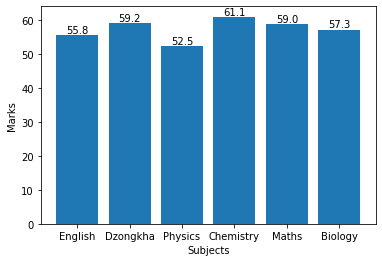

In [ ]:
marks=[eng12,dzo12,phy12,che12,math12,bio12]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.show

Total performance of the Students

<function matplotlib.pyplot.show>

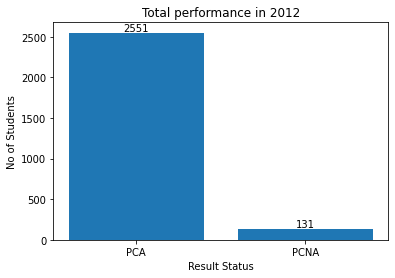

In [ ]:
x = df12['RESULT'].unique()
y=df12['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2012")
plt.show

#2013 Analysis

In [ ]:
df13 = df.groupby('YEAR')
df13 = df13.get_group(2013)
df13.head()


GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
5933      M  2013  SCIENCE    PCA  62.0  25.0  46.0  50.0  20.0  44.0
5934      M  2013  SCIENCE    PCA  50.0  55.0  34.0  48.0  50.0  52.0
5935      M  2013  SCIENCE    PCA  55.0  55.0  62.0  69.0  90.0   NaN
5936      M  2013  SCIENCE    PCA  55.0  60.0  50.0  58.0  69.0   NaN
5937      M  2013  SCIENCE    PCA  46.0  60.0  46.0  48.0  55.0   NaN

Marks obtained

In [ ]:
eng13 = round(df13.ENG.mean(),1)
dzo13 = round(df13.DZO.mean(),1)
phy13 = round(df13.PHY.mean(),1)
che13 = round(df13.CHE.mean(),1)
math13 = round(df13.MATH.mean(),1)
bio13 = round(df13.BIO.mean(),1)


<function matplotlib.pyplot.show>

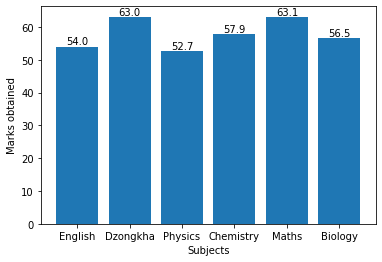

In [ ]:
marks=[eng13,dzo13,phy13,che13,math13,bio13]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

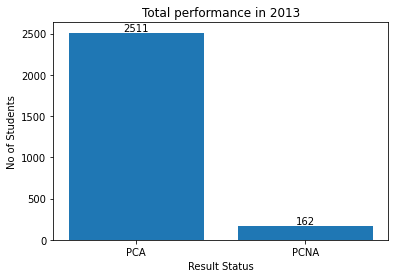

In [ ]:
x = df13['RESULT'].unique()
y=df13['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2013")
plt.show

#2014 Analysis

#2015 Analysis

In [ ]:
df15 = df.groupby('YEAR')
df15 = df15.get_group(2015)
df15.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
11299      M  2015  SCIENCE    PCA  66.0  50.0  91.0  77.0  95.0   NaN
11300      M  2015  SCIENCE    PCA  60.0  65.0  78.0  50.0  52.0   NaN
11301      M  2015  SCIENCE    PCA  69.0  65.0  69.0  70.0  72.0  68.0
11302      M  2015  SCIENCE    PCA  63.0  41.0  76.0  75.0  43.0  76.0
11303      M  2015  SCIENCE    PCA  60.0  67.0  47.0  42.0  55.0   NaN

Marks obtained

In [ ]:
eng15 = round(df15.ENG.mean(),1)
dzo15 = round(df15.DZO.mean(),1)
phy15 = round(df15.PHY.mean(),1)
che15 = round(df15.CHE.mean(),1)
math15 = round(df15.MATH.mean(),1)
bio15 = round(df15.BIO.mean(),1)


<function matplotlib.pyplot.show>

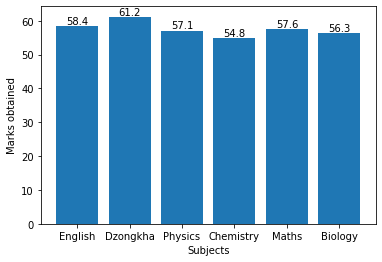

In [ ]:
marks=[eng15,dzo15,phy15,che15,math15,bio15]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

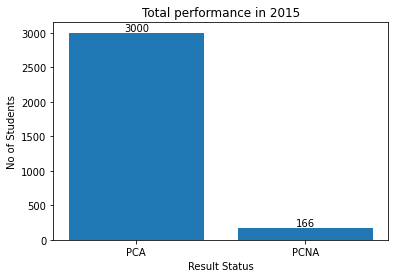

In [ ]:
x = df15['RESULT'].unique()
y=df15['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2015")
plt.show

#2016 Analysis

In [ ]:
df16 = df.groupby('YEAR')
df16 = df16.get_group(2016)
df16.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH  BIO
2747      M  2016  SCIENCE    PCA  54.0  52.0  42.0  45.0  51.0  NaN
2748      M  2016  SCIENCE   PCNA  50.0  54.0  47.0  35.0  22.0  NaN
2749      M  2016  SCIENCE   PCNA  45.0  41.0  43.0  31.0  35.0  NaN
2750      M  2016  SCIENCE    PCA  55.0  56.0  67.0  57.0  70.0  NaN
2751      M  2016  SCIENCE    PCA  56.0  76.0  60.0  48.0  67.0  NaN

In [ ]:
eng16 = round(df16.ENG.mean(),1)
dzo16 = round(df16.DZO.mean(),1)
phy16 = round(df16.PHY.mean(),1)
che16 = round(df16.CHE.mean(),1)
math16 = round(df16.MATH.mean(),1)
bio16 = round(df16.BIO.mean(),2)


<function matplotlib.pyplot.show>

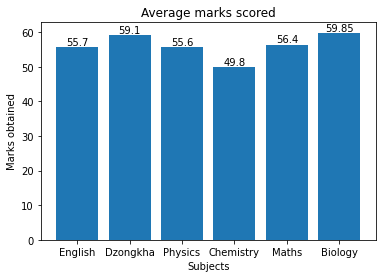

In [ ]:
marks=[eng16,dzo16,phy16,che16,math16,bio16]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.title("Average marks scored")
plt.ylabel("Marks obtained")
plt.show

In [ ]:
x=df16['RESULT'].unique()
y=df16['RESULT'].value_counts()

# for i in range(len(x)):
#   plt.text(i,y[i],y[i],ha="center",va = "bottom")
# plt.xlabel("Result Status")
# plt.ylabel("No of Students")
# plt.title("Total performance in 2016")
# plt.show
x

array(['PCA', 'PCNA'], dtype=object)

#2017 Analysis

In [ ]:
df17 = df.groupby('YEAR')
df17 = df17.get_group(2017)
df17.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
8662      M  2017  SCIENCE    PCA  60.0  42.0  61.0  57.0  61.0  53.0
8663      M  2017  SCIENCE    PCA  61.0   NaN  50.0  47.0  46.0   NaN
8664      M  2017  SCIENCE    PCA  62.0  65.0  59.0  56.0  44.0   NaN
8665      M  2017  SCIENCE    PCA  70.0   NaN  64.0  56.0  77.0   NaN
8666      M  2017  SCIENCE    PCA  56.0  61.0  62.0  57.0  58.0  66.0

In [ ]:
eng17 = round(df17.ENG.mean(),1)
dzo17 = round(df17.DZO.mean(),1)
phy17 = round(df17.PHY.mean(),1)
che17 = round(df17.CHE.mean(),1)
math17 = round(df17.MATH.mean(),1)
bio17 = round(df17.BIO.mean(),1)


<function matplotlib.pyplot.show>

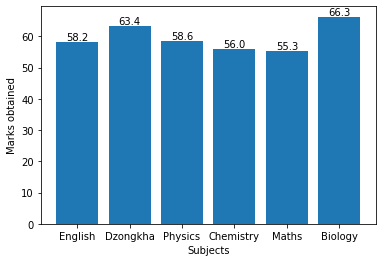

In [ ]:
marks=[eng17,dzo17,phy17,che17,math17,bio17]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

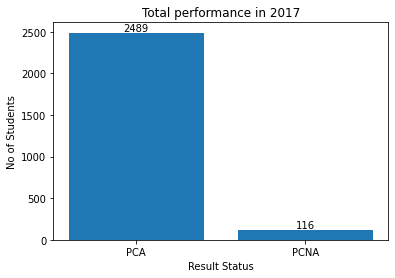

In [ ]:
x = df17['RESULT'].unique()
y=df17['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2017")
plt.show

#2018 Analysis

In [ ]:
df18 = df.groupby('YEAR')
df18 = df18.get_group(2018)
df18.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
17173      M  2018  SCIENCE    PCA  66.0  57.0  55.0  42.0  43.0  49.0
17174      M  2018  SCIENCE    PCA  74.0  57.0  64.0  49.0  40.0  49.0
17175      M  2018  SCIENCE    PCA  75.0  57.0  86.0  64.0  91.0   NaN
17176      M  2018  SCIENCE    PCA  45.0  42.0  44.0  37.0  43.0   NaN
17177      M  2018  SCIENCE    PCA  57.0  62.0  59.0  41.0  50.0  64.0

In [ ]:
eng18 = round(df18.ENG.mean(),1)
dzo18 = round(df18.DZO.mean(),1)
phy18 = round(df18.PHY.mean(),1)
che18 = round(df18.CHE.mean(),1)
math18 = round(df18.MATH.mean(),1)
bio18 = round(df18.BIO.mean(),1)


<function matplotlib.pyplot.show>

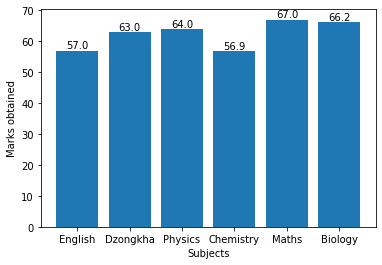

In [ ]:
marks=[eng18,dzo18,phy18,che18,math18,bio18]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

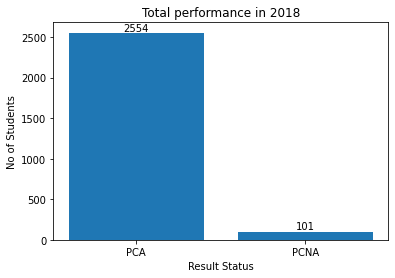

In [ ]:
x = df18['RESULT'].unique()
y=df18['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2018")
plt.show

#2019 Analysis

In [ ]:
df19 = df.groupby('YEAR')
df19 = df19.get_group(2019)
df19.head()

GENDER  YEAR   STREAM RESULT   ENG   DZO   PHY   CHE  MATH   BIO
14563      M  2019  SCIENCE    PCA  63.0  58.0  75.0  58.0  56.0   NaN
14565      M  2019  SCIENCE    PCA  70.0  65.0  57.0  59.0  59.0  76.0
14566      M  2019  SCIENCE    PCA  58.0  58.0  54.0  51.0  37.0  61.0
14567      M  2019  SCIENCE    PCA  61.0  57.0  74.0  69.0  63.0   NaN
14568      M  2019  SCIENCE    PCA  67.0  70.0  64.0  68.0  65.0  73.0

In [ ]:
eng19 = round(df19.ENG.mean(),1)
dzo19 = round(df19.DZO.mean(),1)
phy19 = round(df19.PHY.mean(),1)
che19 = round(df19.CHE.mean(),1)
math19 = round(df19.MATH.mean(),1)
bio19 = round(df19.BIO.mean(),1)


<function matplotlib.pyplot.show>

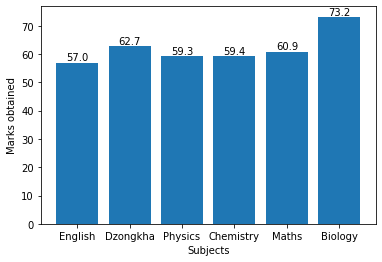

In [ ]:
marks=[eng18,dzo19,phy19,che19,math19,bio19]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

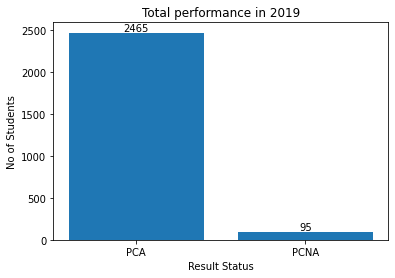

In [ ]:
x = df19['RESULT'].unique()
y=df19['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2019")
plt.show

#Graphing the average marks obtained in each subject over the years

english marks


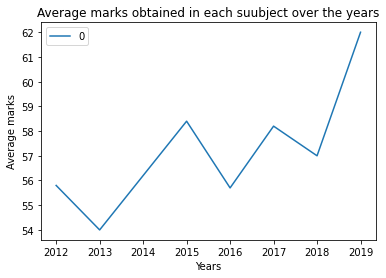

In [ ]:
x=[eng12,eng13,eng15,eng16,eng17,eng18,eng19]
y=[2012,2013,2015,2016,2017,2018,2019]
lpd=pd.DataFrame(x,y)
lpd.plot(kind="line",xlabel="Years",ylabel="Average marks",title="Average marks obtained in each suubject over the years")

math marks

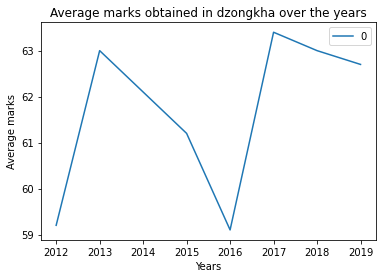

In [ ]:
x=[dzo12,dzo13,dzo15,dzo16,dzo17,dzo18,dzo19]
y=[2012,2013,2015,2016,2017,2018,2019]
lpd=pd.DataFrame(x,y)
lpd.plot(kind="line",xlabel="Years",ylabel="Average marks",title="Average marks obtained in dzongkha over the years")


math marks

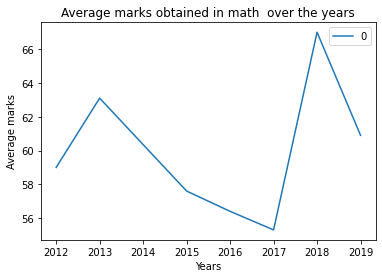

In [ ]:
x=[math12,math13,math15,math16,math17,math18,math19]
y=[2012,2013,2015,2016,2017,2018,2019]
lpd=pd.DataFrame(x,y)
lpd.plot(kind="line",xlabel="Years",ylabel="Average marks",title="Average marks obtained in math  over the years")

bio marks

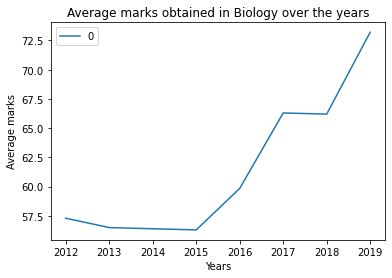

In [ ]:
x=[bio12,bio13,bio15,bio16,bio17,bio18,bio19]
y=[2012,2013,2015,2016,2017,2018,2019]
lpd=pd.DataFrame(x,y)
lpd.plot(kind="line",xlabel="Years",ylabel="Average marks",title="Average marks obtained in Biology over the years")